### *Installation & import*

In [1]:
!pip install pip install feature-engine

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import r2_score

import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.offline as pyo
import plotly.offline as py
import plotly.tools as tls

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


pio.templates.default = "plotly_dark"
matplotlib.style.use('dark_background')

In [3]:
data = pd.read_csv("get_around_pricing_project.csv")
data.head()

,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


### *EDA*

In [4]:
data = data.drop("Unnamed: 0", axis=1)
data.head()

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


In [5]:
# Basic stats
print("Number of rows : {}".format(data.shape[0]))
print()

print("Display of dataset: ")
display(data.head())
print()

print("Basics statistics: ")
data_desc = data.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*data.isnull().sum()/data.shape[0])

Number of rows : 4843

Display of dataset: 


,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183



Basics statistics: 


,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
count,4843,4.843000e+03,4843.00000,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843.000000
unique,28,NaN,NaN,4,10,8,2,2,2,2,2,2,2,NaN
top,Citroën,NaN,NaN,diesel,black,estate,True,True,False,False,False,False,True,NaN
freq,969,NaN,NaN,4641,1633,1606,2662,3839,3865,3881,2613,3674,4514,NaN
mean,NaN,1.409628e+05,128.98823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.214536
std,NaN,6.019674e+04,38.99336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.568268
min,NaN,-6.400000e+01,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
25%,NaN,1.029135e+05,100.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.000000
50%,NaN,1.410800e+05,120.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.000000
75%,NaN,1.751955e+05,135.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.000000



Percentage of missing values: 


model_key                    0.0
mileage                      0.0
engine_power                 0.0
fuel                         0.0
paint_color                  0.0
car_type                     0.0
private_parking_available    0.0
has_gps                      0.0
has_air_conditioning         0.0
automatic_car                0.0
has_getaround_connect        0.0
has_speed_regulator          0.0
winter_tires                 0.0
rental_price_per_day         0.0
dtype: float64

*No missing values*

[Text(0.5, 1.0, 'Target visualization')]

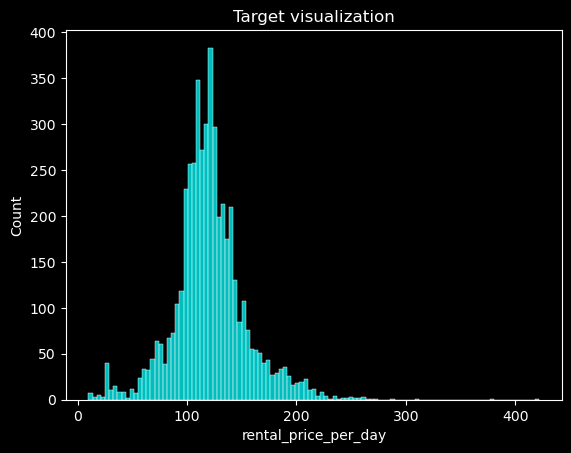

In [6]:
# Target visualization
sns.histplot(x=data['rental_price_per_day'], color="cyan").set(title="Target visualization")

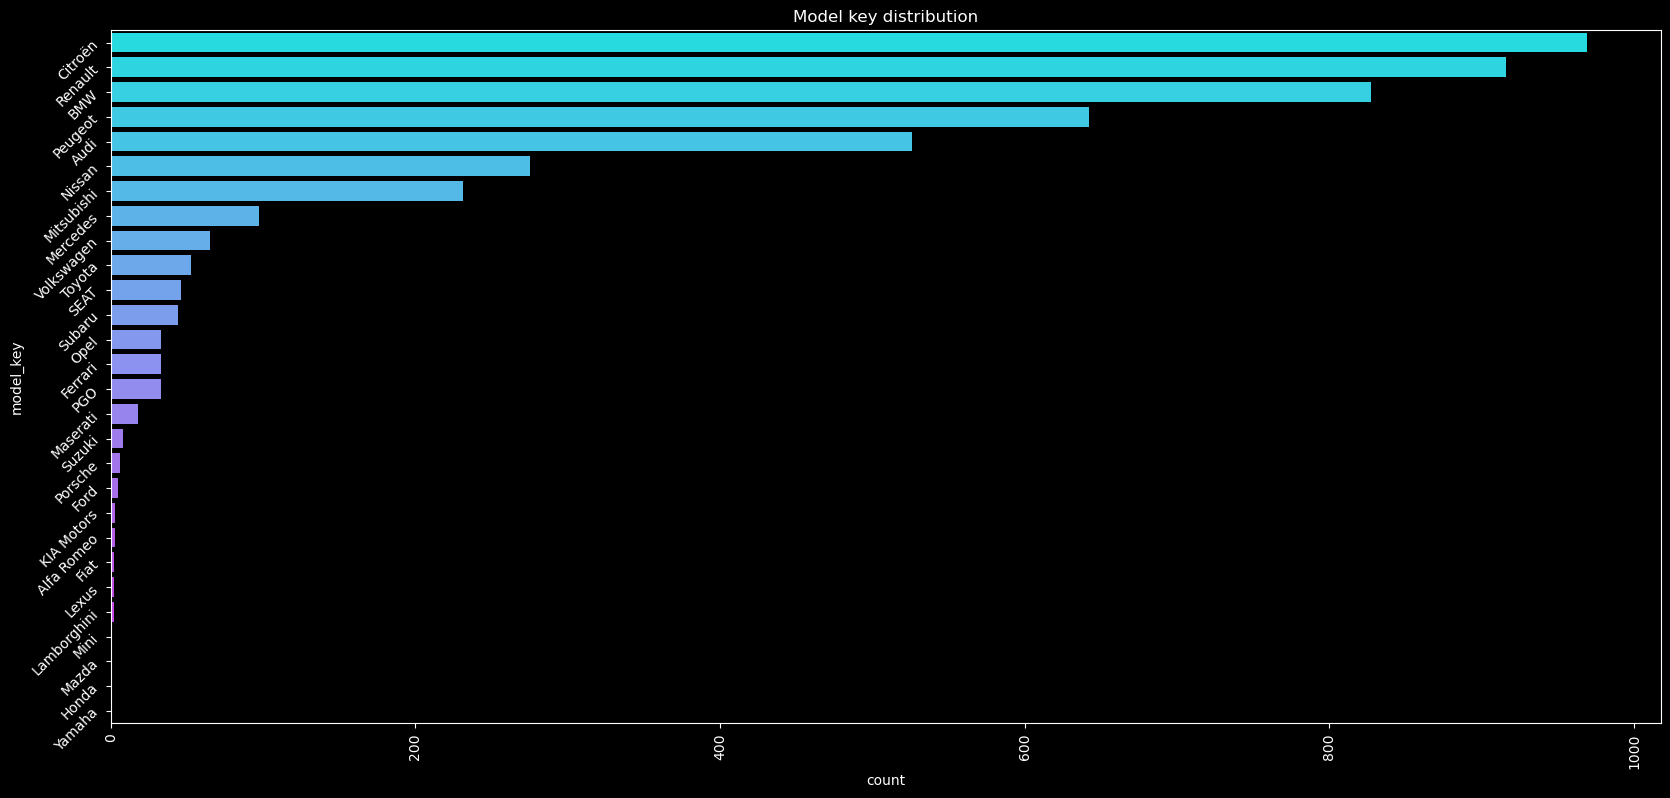

In [7]:
# model key 
palette="cool"
fig = plt.figure(figsize = (20,9))
fig = sns.countplot(y= "model_key", data = data, palette=palette, order = data["model_key"].value_counts().index).set(title="Model key distribution")
fig = plt.xticks(rotation=90)
fig = plt.yticks (rotation = 45, fontsize = 10)

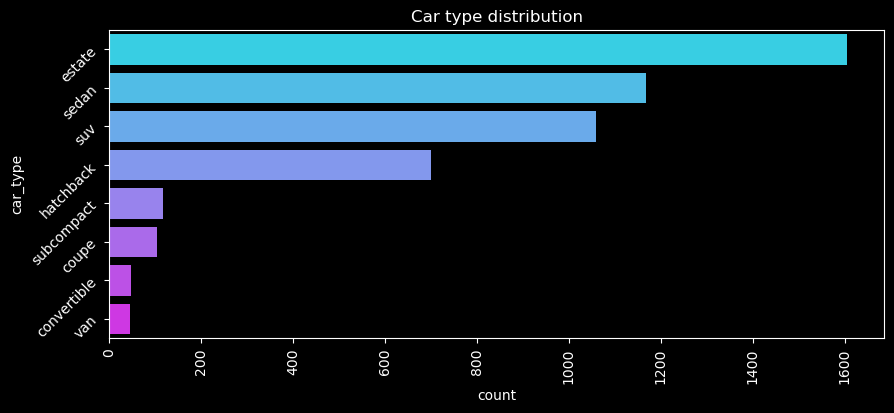

In [8]:
# car type
fig = plt.figure(figsize = (10,4))
fig = sns.countplot(y= "car_type", data = data, palette=palette, order = data["car_type"].value_counts().index).set(title="Car type distribution")
fig = plt.xticks(rotation=90)
fig = plt.yticks (rotation = 45, fontsize = 10)

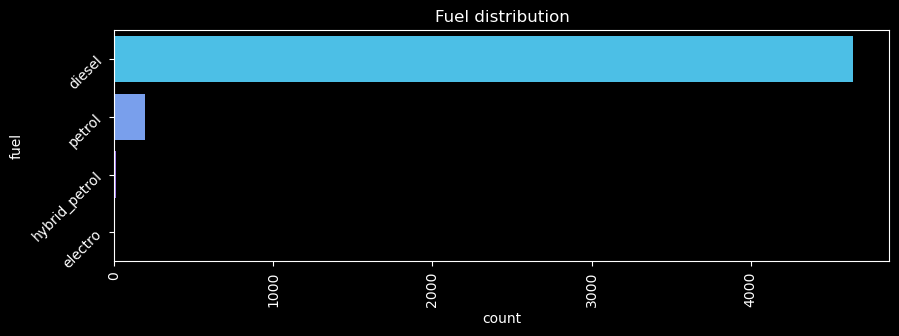

In [9]:
# Fuel distribution
fig = plt.figure(figsize = (10,3))
fig = sns.countplot(y= "fuel", data = data, palette=palette, order = data["fuel"].value_counts().index).set(title="Fuel distribution")
fig = plt.xticks(rotation=90)
fig = plt.yticks (rotation = 45, fontsize = 10)

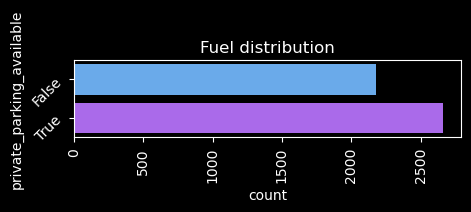

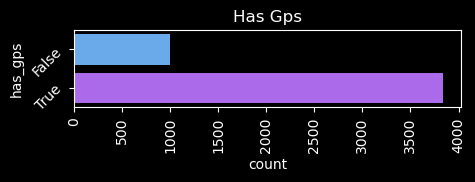

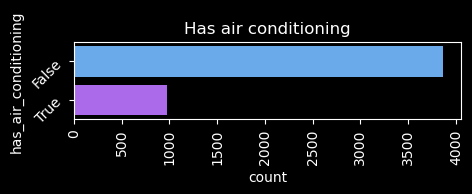

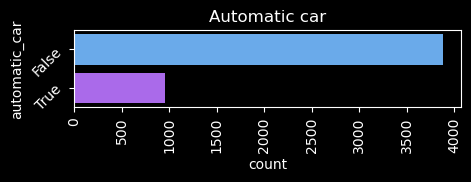

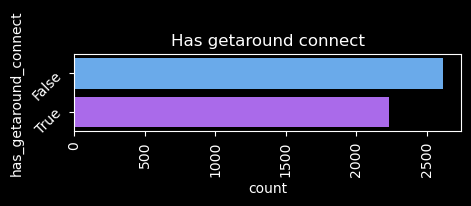

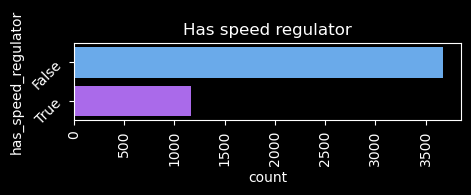

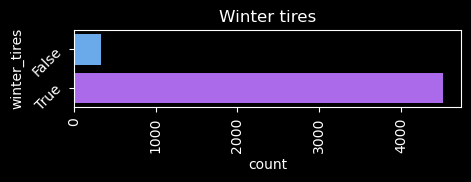

In [10]:
# True / False visualization
fig1 = plt.figure(figsize = (5,1))
fig1 = sns.countplot(y= "private_parking_available", data = data, palette=palette).set(title="Fuel distribution")
fig1 = plt.xticks(rotation=90)
fig1= plt.yticks (rotation = 45, fontsize = 10)

fig2 = plt.figure(figsize = (5,1))
fig2 = sns.countplot(y= "has_gps", data = data, palette=palette).set(title="Has Gps")
fig2 = plt.xticks(rotation=90)
fig2 = plt.yticks (rotation = 45, fontsize = 10)

fig3 = plt.figure(figsize = (5,1))
fig3 = sns.countplot(y= "has_air_conditioning", data = data, palette=palette).set(title="Has air conditioning")
fig3 = plt.xticks(rotation=90)
fig3 = plt.yticks (rotation = 45, fontsize = 10)

fig4 = plt.figure(figsize = (5,1))
fig4 = sns.countplot(y= "automatic_car", data = data, palette=palette).set(title="Automatic car")
fig4 = plt.xticks(rotation=90)
fig4 = plt.yticks (rotation = 45, fontsize = 10)

fig5 = plt.figure(figsize = (5,1))
fig5 = sns.countplot(y= "has_getaround_connect", data = data, palette=palette).set(title="Has getaround connect")
fig5 = plt.xticks(rotation=90)
fig5 = plt.yticks (rotation = 45, fontsize = 10)

fig6 = plt.figure(figsize = (5,1))
fig6 = sns.countplot(y= "has_speed_regulator", data = data, palette=palette).set(title="Has speed regulator")
fig6 = plt.xticks(rotation=90)
fig6 = plt.yticks (rotation = 45, fontsize = 10)

fig7 = plt.figure(figsize = (5,1))
fig7 = sns.countplot(y= "winter_tires", data = data, palette=palette).set(title="Winter tires")
fig7 = plt.xticks(rotation=90)
fig7 = plt.yticks (rotation = 45, fontsize = 10)

### *Baseline model : linear regression*

In [11]:
# Separate target variable Y from features X
features_list = list(data.columns[:-1])
target_variable = 'rental_price_per_day'

X = data.loc[:, features_list]
Y = data.loc[:, target_variable]

In [12]:
# Divide dataset Train set & Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train.head()

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires
4550,BMW,132485,135,diesel,white,suv,True,True,False,False,False,False,True
1237,Citroën,131121,135,diesel,black,estate,False,True,False,False,True,False,True
3158,Renault,209216,135,diesel,grey,sedan,True,True,False,False,True,False,True
900,Peugeot,148986,100,diesel,black,estate,True,True,False,False,False,False,True
933,Citroën,170500,135,diesel,black,estate,True,True,False,False,False,False,True


In [13]:
# Automatically detect positions of numeric and categorical features
numeric_features = []
categorical_features = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['mileage', 'engine_power']
Found categorical features  ['model_key', 'fuel', 'paint_color', 'car_type', 'private_parking_available', 'has_gps', 'has_air_conditioning', 'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires']


In [14]:
from feature_engine.encoding import RareLabelEncoder

*The RareLabelCategoricalEncoder() works only with categorical variables. A list of variables can be indicated, or the encoder will automatically select all categorical variables in the train set*

In [15]:
# Rare encoding
rare_encoder = RareLabelEncoder(tol=0.01, n_categories=5, variables=['paint_color', 'model_key'],replace_with='Other')
X = rare_encoder.fit_transform(X)

In [16]:
# Divide dataset Train set & Test set 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [17]:
# Create pipeline for numeric features
numeric_transformer = StandardScaler()

# Create pipeline for categorical features
categorical_transformer = OneHotEncoder(drop='first', sparse=False)

## Combine the transformers into a single object / Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
        ])

In [18]:
# Fit and transform on X_train
X_train = preprocessor.fit_transform(X_train)

# Transform on X_test
X_test = preprocessor.transform(X_test)

In [19]:
# Train model
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [20]:
# Performance assessment
Y_train_pred = regressor.predict(X_train)
# Predictions on test set
Y_test_pred = regressor.predict(X_test)

In [21]:
# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.7039921450213431
R2 score on test set :  0.678984019237355


### *Features importance*

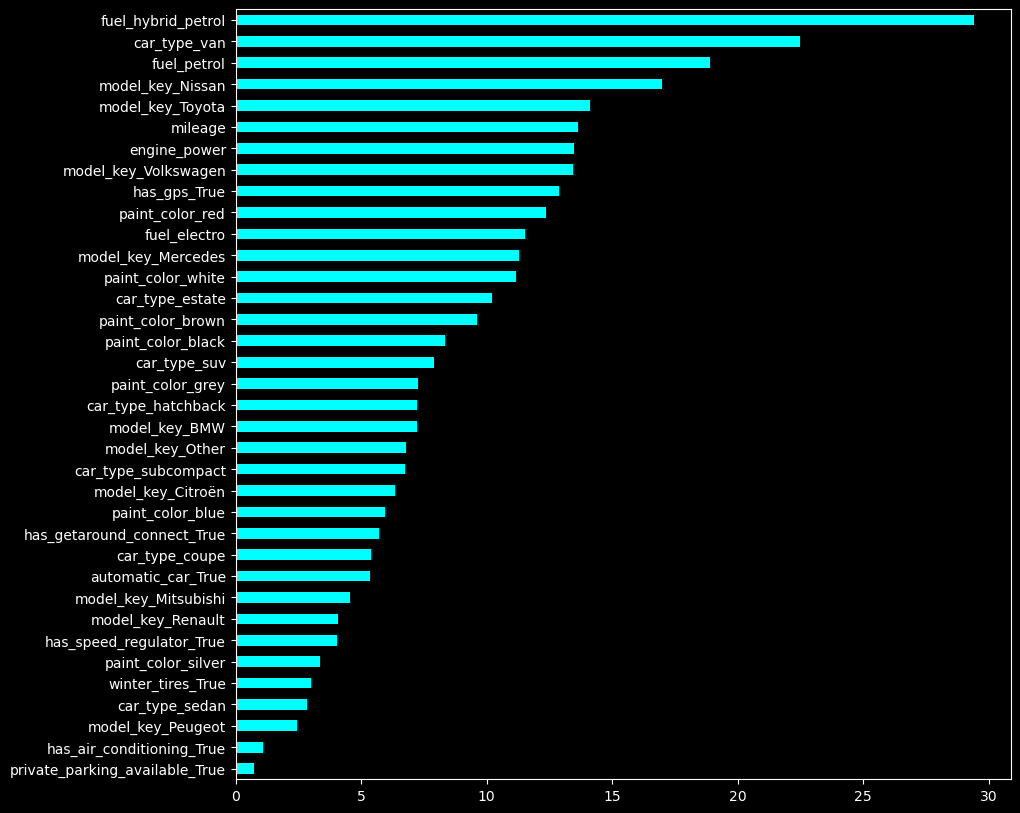

In [25]:
col_names = list(preprocessor.transformers_[0][1].get_feature_names_out()) + list(preprocessor.transformers_[1][1].get_feature_names_out())
features_importance = pd.Series(np.abs(regressor.coef_), index=col_names).sort_values(ascending=False)
plt.figure(figsize=(10,10))
features_importance.sort_values().plot(kind='barh', color="cyan")
plt.show() 